In [469]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf  # for data
from pandas_datareader import data as pdr
import altair as alt
yf.pdr_override()

In [470]:
def read_data(stock='QQQ'):


    df = pdr.get_data_yahoo(stock,period = "360d",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "1d",) 
    return df

In [471]:
df = read_data(stock='AAPL')

[*********************100%***********************]  1 of 1 completed


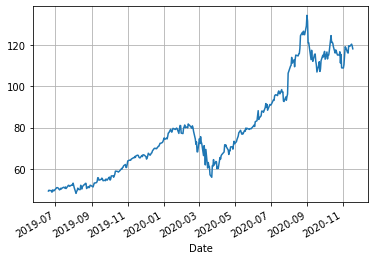

In [472]:
df['Close'].plot(grid = True);

In [473]:
# returns : 
daily_close = df[['Adj Close']]

In [474]:
daily_pct_change = (daily_close/daily_close.shift(1))-1

In [475]:
daily_pct_change.head(5)

,Adj Close
Date,
2019-06-19,NaN
2019-06-20,0.008036
2019-06-21,-0.003409
2019-06-24,-0.001006
2019-06-25,-0.015158


In [476]:
len(daily_pct_change)

360

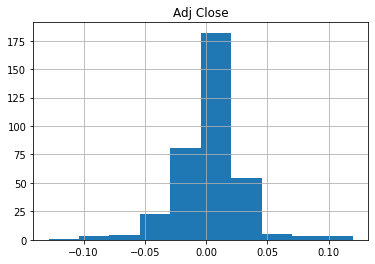

In [477]:
# looking at the histrgram
daily_pct_change.hist();


In [478]:
# inspect the daily statisics
daily_pct_change.describe()

,Adj Close
count,359.000000
mean,0.002821
std,0.025688
min,-0.128647
25%,-0.007566
50%,0.002548
75%,0.015726
max,0.119808


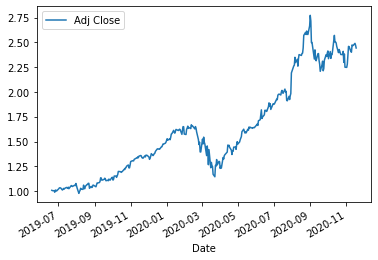

In [479]:
# plotting
cum_daily_return = (1+daily_pct_change).cumprod()
cum_daily_return.plot();

In [480]:
# how about monthly return
cum_daily_return.resample("M").mean()

,Adj Close
Date,
2019-06-30,1.003437
2019-07-31,1.037127
2019-08-31,1.038704
2019-09-30,1.105894
2019-10-31,1.193614
2019-11-30,1.334989
2019-12-31,1.407034
2020-01-31,1.587109
2020-02-29,1.586773


In [481]:
# changing the interval change the shape of the plot completely

### Multiple stocks

In [482]:
def read_multiple_data(stocks=['TSLA','LYFT']):
    
    """
    join data for multiple stocks with two keys, one for ticker and one for date
    
    """
    
    joind_data = map(read_data,stocks)

    return pd.concat(joind_data,keys = stocks, names = ['Ticker','Date'])

In [483]:
df = read_multiple_data(stocks=['ZM','AAPL','TSLA'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [484]:
df

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
ZM     2019-06-19  100.489998  104.445000   98.629997  102.389999  102.389999   
       2019-06-20  105.010002  107.339996  101.621002  102.300003  102.300003   
       2019-06-21  101.419998  101.531998   97.820000  100.470001  100.470001   
       2019-06-24  100.849998  101.500000   88.879997   89.410004   89.410004   
       2019-06-25   89.430000   91.500000   84.629997   85.029999   85.029999   
...                       ...         ...         ...         ...         ...   
TSLA   2020-11-12  415.049988  423.000000  409.519989  411.760010  411.760010   
       2020-11-13  410.850006  412.529999  401.660004  408.500000  408.500000   
       2020-11-16  408.929993  412.450012  404.089996  408.089996  408.089996   
       2020-11-17  460.170013  462.000000  433.010010  441.609985  441.609985   
       2020-11-18  448.350006  496.000000  443.500000  486.640015  486.640015   

                     Volume  
Ticker Date                  
ZM     2019-06-19   2592700  
       2019-06-20   2460700  
       2019-06-21   2972500  
       2019-06-24   6011200  
       2019-06-25   3744500  
...                     ...  
TSLA   2020-11-12  19855100  
       2020-11-13  19771100  
       2020-11-16  26838600  
       2020-11-17  61188300  
       2020-11-18  77698800  

[1080 rows x 6 columns]

In [485]:
df['daily_pct_change'] = (df['Adj Close']/df['Adj Close'].shift(1))-1

In [486]:
df = df.reset_index()

In [487]:
df['cum_daily_return'] = (1+df['daily_pct_change']).cumprod()

In [488]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,daily_pct_change,cum_daily_return
0,ZM,2019-06-19,100.489998,104.445000,98.629997,102.389999,102.389999,2592700,NaN,NaN
1,ZM,2019-06-20,105.010002,107.339996,101.621002,102.300003,102.300003,2460700,-0.000879,0.999121
2,ZM,2019-06-21,101.419998,101.531998,97.820000,100.470001,100.470001,2972500,-0.017889,0.981248
3,ZM,2019-06-24,100.849998,101.500000,88.879997,89.410004,89.410004,6011200,-0.110083,0.873230
4,ZM,2019-06-25,89.430000,91.500000,84.629997,85.029999,85.029999,3744500,-0.048988,0.830452
...,...,...,...,...,...,...,...,...,...,...
1075,TSLA,2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100,-0.012874,4.021487
1076,TSLA,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,-0.007917,3.989647
1077,TSLA,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,-0.001004,3.985643
1078,TSLA,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300,0.082139,4.313019


In [489]:
# plotting daily return

alt.Chart(df,title = 'Daily return').mark_line(interpolate='basis', ).encode(
    x='Date:T',
    y='daily_pct_change:Q',
    color='Ticker:N'
)



alt.Chart(...)

In [490]:
alt.Chart(df,title = 'Cumlative return').mark_line(interpolate='basis').encode(
    x='Date:T',
    y='cum_daily_return:Q',
    color='Ticker:N'
)



alt.Chart(...)

In [491]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,daily_pct_change,cum_daily_return
0,ZM,2019-06-19,100.489998,104.445000,98.629997,102.389999,102.389999,2592700,NaN,NaN
1,ZM,2019-06-20,105.010002,107.339996,101.621002,102.300003,102.300003,2460700,-0.000879,0.999121
2,ZM,2019-06-21,101.419998,101.531998,97.820000,100.470001,100.470001,2972500,-0.017889,0.981248
3,ZM,2019-06-24,100.849998,101.500000,88.879997,89.410004,89.410004,6011200,-0.110083,0.873230
4,ZM,2019-06-25,89.430000,91.500000,84.629997,85.029999,85.029999,3744500,-0.048988,0.830452
...,...,...,...,...,...,...,...,...,...,...
1075,TSLA,2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100,-0.012874,4.021487
1076,TSLA,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,-0.007917,3.989647
1077,TSLA,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,-0.001004,3.985643
1078,TSLA,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300,0.082139,4.313019


In [492]:
daily_close_px =df[['Date', 'Ticker', 'Adj Close']]

In [493]:
daily_close_px = daily_close_px.fillna(0)

In [494]:
min_periods = 26

# Calculate the volatility
daily_close_px['vol'] = daily_close_px['Adj Close'].rolling(min_periods).std() * np.sqrt(min_periods) 



In [495]:
alt.Chart(daily_close_px,title = 'Volatility').mark_line(interpolate='basis').encode(
    x='Date:T',
    y='vol:Q',
    color='Ticker:N'
)



alt.Chart(...)

In [496]:
df1 = df[df['Ticker'].isin(['ZM','TSLA'])][['Date','Ticker','daily_pct_change']]

#plt.scatter(df_zm,df_tsla)

In [497]:
df1

,Date,Ticker,daily_pct_change
0,2019-06-19,ZM,NaN
1,2019-06-20,ZM,-0.000879
2,2019-06-21,ZM,-0.017889
3,2019-06-24,ZM,-0.110083
4,2019-06-25,ZM,-0.048988
...,...,...,...
1075,2020-11-12,TSLA,-0.012874
1076,2020-11-13,TSLA,-0.007917
1077,2020-11-16,TSLA,-0.001004
1078,2020-11-17,TSLA,0.082139


In [523]:
df12 = df1.pivot(index='Date', columns='Ticker', values='daily_pct_change').dropna()

    
df12             

Ticker,TSLA,ZM
Date,,
2019-06-20,-0.030076,-0.000879
2019-06-21,0.010199,-0.017889
2019-06-24,0.008023,-0.110083
2019-06-25,-0.017349,-0.048988
2019-06-26,-0.002230,0.015289
...,...,...
2020-11-12,-0.012874,0.037016
2020-11-13,-0.007917,-0.058464
2020-11-16,-0.001004,-0.010977


In [561]:
alt.Chart(df12,title = 'Stocks inter-relationship').mark_point(interpolate='basis').encode(
    x='TSLA:Q',
    y='ZM:Q',
)




alt.Chart(...)

In [562]:
### building linear model

In [529]:
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import train_test_split

In [556]:
X = df12[['TSLA']].values
y = df12[['ZM']].values

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 11)
print(len(X_train))
print(len(y_train))

323
323


In [557]:
lr = LinearRegression().fit(X_train,y_train)

In [558]:
lr.score(X_test,y_test)

-0.11379600346318797